In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.cluster.vq import kmeans as kmeanss
from scipy.cluster.vq import vq as vqs
from sklearn.metrics import confusion_matrix 
from scipy.stats import norm as detnorm
from math import sqrt
import math
import numpy as np
import numpy.linalg as linalg
from random import sample
import csv
import copy
import os
import glob

In [233]:
def func2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes =["0","1","2","4","5"] 
    # classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [234]:
onetpath = r'/home/subbu/PRML/PRML3/1/train'
fourtpath = r'/home/subbu/PRML/PRML3/4/train'
sixtpath = r'/home/subbu/PRML/PRML3/6/train'
otpath = r'/home/subbu/PRML/PRML3/o/train'
ztpath = r'/home/subbu/PRML/PRML3/z/train'
#data = np.genfromtxt(onepath+"/ac_1.mfcc",dtype=float,delimiter=' ',skip_header=1)
#tc,trc,astates= counter(data,3)
#print(astates)
symbols = 20
tdl=[]

In [235]:
datal=[]
filenames=glob.glob(onetpath+"/*.mfcc")
k = 3
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    i = i+1
    datal.append(data)
nud = datal[0]
l = i
print(i)
i = i - 1
for j in range(l-1):
    nud =np.concatenate((nud,datal[j+1]))
    #print(j)
    i = i-1;

tdl.append(datal)
tnud = nud

datal=[]
filenames=glob.glob(fourtpath+"/*.mfcc")
k = 3
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    i = i+1
    datal.append(data)
nud = datal[0]
l = i
print(i)
i = i - 1
for j in range(l-1):
    nud =np.concatenate((nud,datal[j+1]))
    #print(j)
    i = i-1;

tdl.append(datal)
tnud = np.concatenate((tnud,nud))

datal=[]
filenames=glob.glob(sixtpath+"/*.mfcc")
k = 3
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    i = i+1
    datal.append(data)
nud = datal[0]
l = i
print(i)
i = i - 1
for j in range(l-1):
    nud =np.concatenate((nud,datal[j+1]))
    #print(j)
    i = i-1;

tdl.append(datal)
tnud = np.concatenate((tnud,nud))

datal=[]
filenames=glob.glob(otpath+"/*.mfcc")
k = 3
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    i = i+1
    datal.append(data)
nud = datal[0]
l = i
print(i)
i = i - 1
for j in range(l-1):
    nud =np.concatenate((nud,datal[j+1]))
    #print(j)
    i = i-1;

tdl.append(datal)
tnud = np.concatenate((tnud,nud))

datal=[]
filenames=glob.glob(ztpath+"/*.mfcc")
k = 3
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    i = i+1
    datal.append(data)
nud = datal[0]
l = i
print(i)
i = i - 1
for j in range(l-1):
    nud =np.concatenate((nud,datal[j+1]))
    #print(j)
    i = i-1;

tdl.append(datal)
tnud = np.concatenate((tnud,nud))
cen,a  = kmeanss(tnud,symbols)

39
39
39
39
39


In [236]:
datal = tdl[0]
with open('hmm-1.04/1.hmm', 'w') as f:
    for i in range(39):
        idx,_ = vqs(datal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")

In [237]:
datal=tdl[1]
with open('hmm-1.04/4.hmm', 'w') as f:
    for i in range(39):
        idx,_ = vqs(datal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")

In [238]:
datal=tdl[2]
with open('hmm-1.04/6.hmm', 'w') as f:
    for i in range(39):
        idx,_ = vqs(datal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")

In [239]:
datal = tdl[3]
with open('hmm-1.04/o.hmm', 'w') as f:
    for i in range(39):
        idx,_ = vqs(datal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")

In [240]:
datal = tdl[4]
with open('hmm-1.04/z.hmm', 'w') as f:
    for i in range(39):
        idx,_ = vqs(datal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")

In [230]:
onedpath = r'/home/subbu/PRML/PRML3/1/dev'
fourdpath = r'/home/subbu/PRML/PRML3/4/dev'
sixdpath = r'/home/subbu/PRML/PRML3/6/dev'
odpath = r'/home/subbu/PRML/PRML3/o/dev'
zdpath = r'/home/subbu/PRML/PRML3/z/dev'

filenames=glob.glob(onedpath+"/*.mfcc")
print(filenames)
onedatal=[]
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    onedatal.append(data)
filenames=glob.glob(fourdpath+"/*.mfcc")
fourdatal=[]
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    fourdatal.append(data)
filenames=glob.glob(sixdpath+"/*.mfcc")
sixdatal=[]
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    sixdatal.append(data)
filenames=glob.glob(odpath+"/*.mfcc")
odatal=[]
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    odatal.append(data)
filenames=glob.glob(zdpath+"/*.mfcc")
zdatal=[]
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    zdatal.append(data)
with open('hmm-1.04/oned.hmm', 'w') as f:
    for i in range(12):
        idx,_ = vqs(onedatal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")
with open('hmm-1.04/fourd.hmm', 'w') as f:
    for i in range(12):
        idx,_ = vqs(fourdatal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")
with open('hmm-1.04/sixd.hmm', 'w') as f:
    for i in range(12):
        idx,_ = vqs(sixdatal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")
with open('hmm-1.04/od.hmm', 'w') as f:
    for i in range(12):
        idx,_ = vqs(odatal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")
with open('hmm-1.04/zd.hmm', 'w') as f:
    for i in range(12):
        idx,_ = vqs(zdatal[i],cen)
        for item in idx:
            f.write("%s " % item)
        f.write("\n")
tddl=[]
tddl.append(onedatal)
tddl.append(fourdatal)
tddl.append(sixdatal)
tddl.append(odatal)
tddl.append(zdatal)


['/home/subbu/PRML/PRML3/1/dev/ms_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/pm_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/ng_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/pk_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/nc_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/mw_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/pe_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/mk_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/pp_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/nh_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/ra_1.mfcc', '/home/subbu/PRML/PRML3/1/dev/mm_1.mfcc']


In [231]:
np.shape(tddl[0])

(12,)

In [232]:
T=np.full(12,0,dtype='int')
T = np.concatenate((T,np.full(12,1,dtype='int')))
T = np.concatenate((T,np.full(12,2,dtype='int')))
T = np.concatenate((T,np.full(12,3,dtype='int')))
T = np.concatenate((T,np.full(12,4,dtype='int')))
#print(T)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


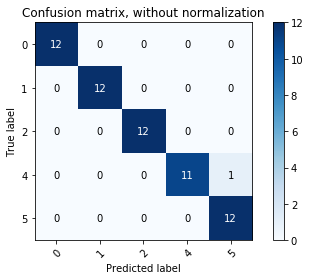

In [60]:
def datafromtxt(f):
    fl = open(f,"r+")
    l=fl.readlines()
    temp1=l[0].split(" ")
    #print(temp1)
    temp=np.zeros(60)
    i=1
    for j in range(60):
        temp[j]=float(temp1[i])
        i = i + 1
    return temp

hmmpath = r'/home/subbu/PRML/PRML3/hmm-1.04'
files=glob.glob(hmmpath+"/one_dev_prob.txt")
for f in files:
    onep = datafromtxt(f)
files=glob.glob(hmmpath+"/four_dev_prob.txt")
for f in files:
    fourp = datafromtxt(f)
files=glob.glob(hmmpath+"/six_dev_prob.txt")
for f in files:
    sixp = datafromtxt(f)
files=glob.glob(hmmpath+"/o_dev_prob.txt")
for f in files:
    op = datafromtxt(f)
files=glob.glob(hmmpath+"/z_dev_prob.txt")
for f in files:
    zp = datafromtxt(f)

Rh=np.zeros((60,5))
for i in range(60):
    Rh[i][0]=onep[i]
    Rh[i][1]=fourp[i]
    Rh[i][2]=sixp[i]
    Rh[i][3]=op[i]
    Rh[i][4]=zp[i]


#print(Rh)

Classified =[]
s = np.shape(Rh)
for i in range(s[0]):
    m = -(2**31)
    maxind=-1
    for j in range(5):
        if(Rh[i][j] >= m):
            m = Rh[i][j]
            maxind = j
    Classified.append(maxind)

print(Classified)

func2(T,Classified,classes=["1","2","3"],title='Confusion matrix')

In [14]:
list1 = [1, 2, 3, 4]

list2 = [0.45, 0.98, 0.89, 0.21]

dat = np.array([list1, list2])

dat = dat.T

np.savetxt('data.txt', dat, delimiter = ',')

///////////This below code is written in attempts to ////////
tc*(1/2)
trc.sum(axis=1)
datal=[]
filenames=glob.glob(onepath+"/*.mfcc")
k = 3
tfv = 0
pic = np.zeros(k)
transc = np.zeros((k,k))
i = 0
for file in filenames:
    data = np.genfromtxt(file,dtype=float,delimiter=' ',skip_header=1)
    tfv = tfv + np.size(data,0)
    print (i)
    i = i +1
    totalcount,transcount = counter(data,k)
    pic = pic + totalcount
    transc = transc + transcount
pip = pic * (1/tfv)
transsum = transc.sum(axis = 1)
transp = np.zeros((k,k))
for i in range(k):
    transp[i][i]=transc[i][i]/transsum[i]
    if i+1 != k:
        transp[i][i+1]=transc[i][i+1]/transsum[i]

print (pip)
print(transp)
    #datal.append(data)
#comb_np = np.vstack(datal)

#oneframe = pd.DataFrame(comb_np)

In [109]:
def dist(a,b):
    n = np.size(a)
    d =0
    #print(n)
    if n!=1:
        for i in range(n):
            d = d + (a[i]-b[i])**2
    else:
        d = (a-b)**2
    return sqrt(d)


def dtw(series1,series2):
    m = len (series1)
    n = len (series2)
    Dtw = np.zeros((n,m))
    #row
    for i in range(1,m):
        Dtw[0,i] = dist(series1[i],series2[0]) + Dtw[0,i-1]
    for i in range(1,n):
        Dtw[i,0] = dist(series1[0],series2[i]) + Dtw[i-1,0]
    for i in range(1,n):
        for j in range(1,m):
            c = dist(series1[j],series2[i])
            Dtw[i,j] = c + np.min([Dtw[i-1,j],Dtw[i,j-1],Dtw[i-1,j-1]])
    return Dtw[n-1,m-1]

In [110]:
s[0]

60

In [111]:
def classifiedchar(series):
    td =[]
    oned = []
    s = np.shape(tdl[0])
    for i in range(s[0]):
        data = tdl[0][i]
        d = dtw(data,series)
        oned.append(d)
    #print(1)
    np.sort(oned)
    l=[]
    for j in range(15):
        l.append(oned[j])
    td.append(l)    
    fourd = []
    s = np.shape(tdl[1])
    for i in range(s[0]):
        data = tdl[1][i]
        d = dtw(data,series)
        fourd.append(d)
    np.sort(fourd)
    l=[]
    for j in range(15):
        l.append(fourd[j])
    td.append(l)    
    #print(4)
    sixd = []
    s = np.shape(tdl[2])
    for i in range(s[0]):
        data = tdl[2][i]
        d = dtw(data,series)
        sixd.append(d)
    np.sort(sixd)
    l=[]
    for j in range(15):
        l.append(sixd[j])
    td.append(l)
    #print(6)
    od = []
    s = np.shape(tdl[3])
    for i in range(s[0]):
        data = tdl[3][i]
        d = dtw(data,series)
        od.append(d)
    np.sort(od)
    l=[]
    for j in range(15):
        l.append(od[j])
    td.append(l)
    #print("o")
    zd = []
    s = np.shape(tdl[4])
    for i in range(s[0]):
        data = tdl[4][i]
        d = dtw(data,series)
        zd.append(d)
    np.sort(zd)
    l=[]
    for j in range(15):
        l.append(zd[j])
    td.append(l)
    #print("z")
    mind = -1
    m = 2**32 
    resp = []
    for j in range(5):
        a = (sum(td[j])/len(td[j]))
        resp.append(a)
        if a <= m:
            m  = a
            mind = j
    #print(td)
    return mind,resp

In [112]:
onedl=[]
s = np.shape(tddl[0])
Resp = []
tr=[]
for i in range(s[0]):
    mi,onedresp = classifiedchar(tddl[0][i])
    tr.append(onedresp)
    onedl.append(mi)
Resp.append(tr)
print(onedl)
fourdl=[]
tr=[]
s = np.shape(tddl[1])
for i in range(s[0]):
    mi,fourdresp = classifiedchar(tddl[1][i])
    fourdl.append(mi)
    tr.append(fourdresp)
print(fourdl)
Resp.append(tr)
tr=[]
sixdl=[]
s = np.shape(tddl[2])
for i in range(s[0]):
    mi,sixdresp = classifiedchar(tddl[2][i])
    sixdl.append(mi)
    tr.append(sixdresp)
print(sixdl)
Resp.append(tr)
odl=[]
tr=[]
s = np.shape(tddl[3])
for i in range(s[0]):
    mi,odresp = classifiedchar(tddl[3][i])
    odl.append(mi)
    tr.append(odresp)
print(odl)
Resp.append(tr)
tr=[]
zdl=[]
s = np.shape(tddl[4])
for i in range(s[0]):
    mi,zdresp = classifiedchar(tddl[4][i])
    zdl.append(mi)
    tr.append(zdresp)
print(zdl)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4]


In [115]:
Resp.append(tr)
print(Resp[0])
print(Resp[1])
print(Resp[2])
print(Resp[3])
print(Resp[4])

[[668.336134924503, 857.5397804103134, 1256.2990032183704, 771.9834249535118, 1034.6112079252705], [680.4298831028204, 847.8984550559661, 1218.511749472832, 735.5240861641697, 1021.5497367029435], [696.6472316181292, 815.0845215280075, 1303.3653801809248, 741.0364379088837, 1013.9376918234382], [611.5461407672881, 892.4807976142536, 1394.701080599428, 769.7554816102645, 1066.1258211842592], [600.2048801249488, 875.3364072252166, 1411.2240151345775, 725.6557052078412, 990.647290194719], [654.6745258135053, 867.481340410333, 1419.3260696414677, 786.1756519178715, 1028.4363924799775], [613.2841098578984, 729.8289497937371, 1233.515080936763, 674.2666550047359, 943.9670610927143], [688.6256588592883, 873.1220960371016, 1288.939345780202, 752.5300438750662, 1073.0548152985805], [675.7393099126218, 904.7490830086925, 1342.881411503641, 790.5046448512627, 1047.420005234268], [607.1086626334442, 842.675385416178, 1324.845035194216, 720.8047182162326, 1039.9519274792776], [738.7257609123798, 98

In [116]:
import numpy as np 

x = ([1, 2, 3, 4, 5])

# Obtain array of square of each element in x
e = lambda t: np.exp(t)
np.array([e(xi) for xi in x])

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [121]:
inv = lambda t: (1/t)
R0=[]
for i in range(np.shape(Resp[0])[0]):
    a=(np.array([inv(xi) for xi in Resp[0][i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    R0.append(a)
R1=[]
for i in range(np.shape(Resp[1])[0]):
    a=(np.array([inv(xi) for xi in Resp[1][i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    R1.append(a)
R2=[]
for i in range(np.shape(Resp[2])[0]):
    a=(np.array([inv(xi) for xi in Resp[2][i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    R2.append(a)
R3=[]
for i in range(np.shape(Resp[3])[0]):
    a=(np.array([inv(xi) for xi in Resp[3][i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    R3.append(a)
R4=[]
for i in range(np.shape(Resp[4])[0]):
    a=(np.array([inv(xi) for xi in Resp[4][i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    R4.append(a)

In [122]:
print(R4)

[array([0.20246506, 0.19007782, 0.15483341, 0.21221204, 0.24041167]), array([0.19600943, 0.20407009, 0.15535073, 0.20152872, 0.24304104]), array([0.21155963, 0.20008689, 0.14379051, 0.21048617, 0.23407681]), array([0.19988906, 0.19911827, 0.15390237, 0.20362042, 0.24346989]), array([0.21313372, 0.20721172, 0.15125337, 0.20765698, 0.2207442 ]), array([0.19846517, 0.1980881 , 0.16450012, 0.20507085, 0.23387576]), array([0.19640805, 0.19622992, 0.14662253, 0.2047072 , 0.25603231]), array([0.20048529, 0.19914152, 0.15896871, 0.20033292, 0.24107156]), array([0.2178705 , 0.21124927, 0.14001829, 0.22707331, 0.20378864]), array([0.19927048, 0.20230224, 0.15016051, 0.20322337, 0.2450434 ]), array([0.20772106, 0.20197807, 0.15681024, 0.20620245, 0.22728818]), array([0.20322074, 0.20306286, 0.1564477 , 0.21071257, 0.22655613])]


In [123]:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
[3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 0, 3]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [124]:
Rn=R0
Rn = np.concatenate((Rn,R1))
Rn = np.concatenate((Rn,R2))
Rn = np.concatenate((Rn,R3))
Rn = np.concatenate((Rn,R4))

R=Resp[0]
R = np.concatenate((R,Resp[1]))
R = np.concatenate((R,Resp[2]))
R = np.concatenate((R,Resp[3]))
R = np.concatenate((R,Resp[4]))


In [160]:
def ROC (P,T):
    inc = 0.001
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(1000) # change accordingly with inc
    FPR = np.zeros(1000)
    i = 0
    #print(n)
    for tet in np.arange(0.0, 1.0, inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
def ROCmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(num+1) # change accordingly with inc
    FPR = np.zeros(num+1)
    i = 0
    #print(n)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)   
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [2]:
# for pretty plot confusion matri

#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn
import warnings


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=20,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 15)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=20, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 20;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#

def the_plot_conf(test,pred):
    """ test function with y_test (actual values) and predictions (predic) """
    #data
    warnings.filterwarnings("ignore")
    y_test = np.array(test)
    predic = np.array(pred)
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 20;
    figsize = [9,9];
    if(len(y_test) > 10):
        fz=20; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predic, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)

In [158]:
def detection_error_tradeoff(fps,fns):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    axis_min = min(fps[0],fns[-1])
    fig,ax = plt.subplots()
    plt.plot(fps,fns)
    plt.yscale('log')
    plt.xscale('log')
    ticks_to_use = [0.005,0.01,0.02,0.05,0.1,0.2,1,2]
    ax.get_xaxis().set_major_formatter(plt.matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.axis([0.001,1,0.001,1])

In [159]:
dnorm = lambda t:(detnorm.ppf(t))    
#a=(np.array([norm(xi) for xi in a]))

In [191]:
def DETmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
    #detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1)
    plt.show()

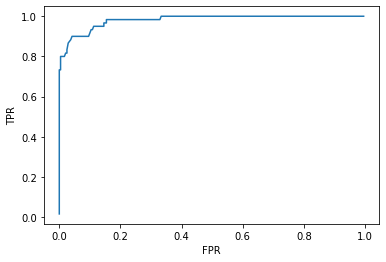

In [162]:
ROCmodf(np.array(Rn),T,1000)

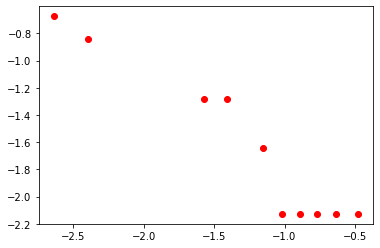

In [189]:
DETmodf(np.array(Rn),T,50)

In [154]:
o = [[1,2],[3,4],[5,6]]
for pol in np.arange(1,3,0.1):
    print(pol)

1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000004
1.5000000000000004
1.6000000000000005
1.7000000000000006
1.8000000000000007
1.9000000000000008
2.000000000000001
2.100000000000001
2.200000000000001
2.300000000000001
2.4000000000000012
2.5000000000000013
2.6000000000000014
2.7000000000000015
2.8000000000000016
2.9000000000000017


In [ ]:
//////////////////////////////DTW DONE/////////////////

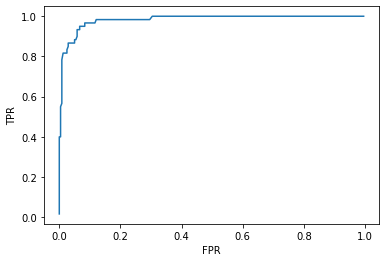

In [184]:
Rha=(np.array(Rh))
ROCmodf(Rha,T,1000)

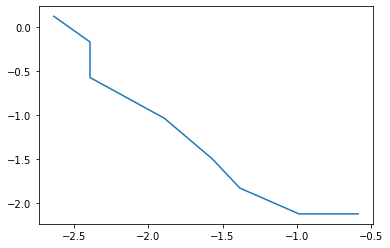

In [254]:
DETmodf(Rha,T,80)

In [4]:
T1=np.full(20,0,dtype='int')
T1 = np.concatenate((T1,np.full(20,1,dtype='int')))
T1 = np.concatenate((T1,np.full(20,2,dtype='int')))
T1 = np.concatenate((T1,np.full(20,3,dtype='int')))
T1 = np.concatenate((T1,np.full(20,4,dtype='int')))

In [7]:
Classi = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

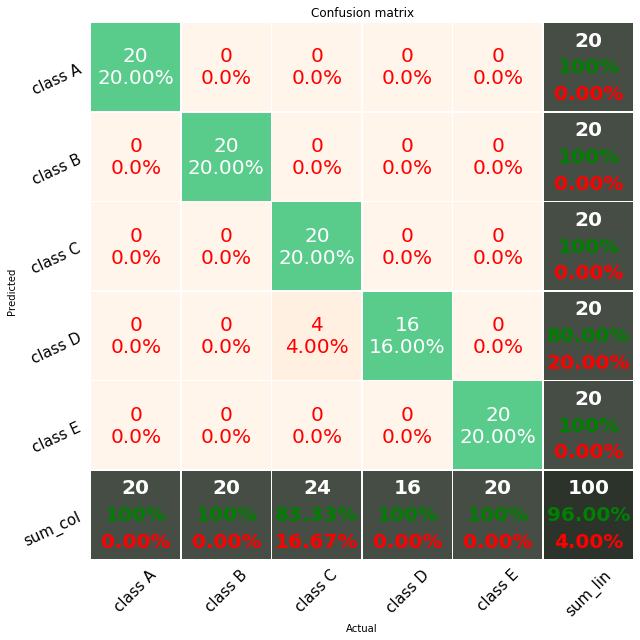

In [9]:
the_plot_conf(Classi,T1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4]


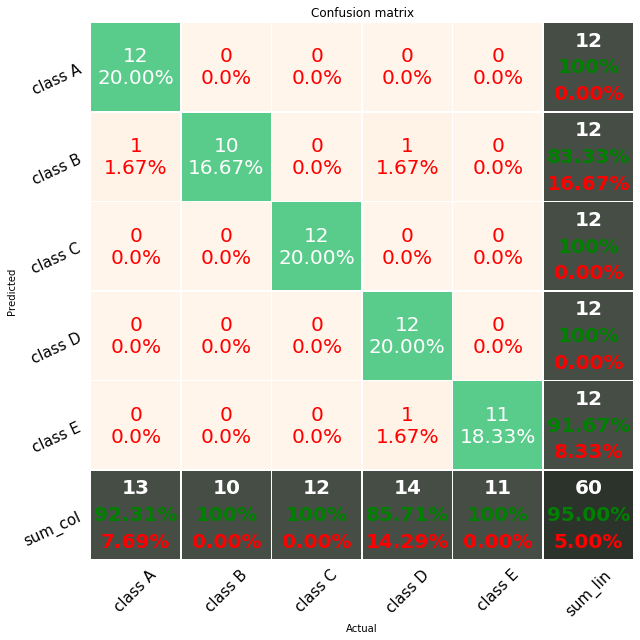

In [194]:

Classified =[]
s = np.shape(Rn)
for i in range(s[0]):
    m = -(2**31)
    maxind=-1
    for j in range(5):
        if(Rn[i][j] >= m):
            m = Rn[i][j]
            maxind = j
    Classified.append(maxind)
print(Classified)
print(T)
pre = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 3, 2, 4, 3, 4, 4, 3, 2, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4]
the_plot_conf(dec,T)

In [ ]:
l=[]
np.shape(l)

In [403]:
str_list = []
def stg(N):
    if(N == 0):
        l=[]
        return l 
    tsl =[]
    for i in range(5):
        sl = stg(N-1)
        s = np.shape(sl)
        if(s[0]==0):
            if(i==0): 
                str='1'
            if(i==1): 
                str='4'
            if(i==2): 
                str='6'
            if(i==3): 
                str='o'
            if(i==4):
                str='z'
            tsl.append(str)
        for j in range(s[0]):
            str=""
            if(i==0): 
                str='1'+sl[j]
            if(i==1): 
                str='4'+sl[j]
            if(i==2): 
                str='6'+sl[j]
            if(i==3): 
                str='o'+sl[j]
            if(i==4):
                str='z'+sl[j]
            tsl.append(str)
    return tsl


In [404]:
len(stg(3)[0])

3

In [405]:
states = [20,20,20,20,20]

def openmodifyretfile(f,k,m):
    fl = open(f,"r+")
    l=fl.readlines()
    lm = []
    for i in range(states[k]):
        if(i == (states[k]-1) and (m==1)):
            t = l[3*i].split("\t")
            #print(t)
            t[0] ='0.000000'
            s = ""
            for j in range(np.shape(t)[0]):
                s = s + t[j]
                if(j < (np.shape(t)[0])-1):
                    s = s + "\t"
            lm.append(s)
            t = l[3*i+1].split("\t")
            t[0] ='1.000000'
            s = t[0] + "\t"
            for j in range((np.shape(t)[0]) - 1):
                temp = j
                s = s + t[temp+1]
                s = s + "\t"
            lm.append(s)
        else:
            lm.append(l[3*i])
            lm.append(l[3*i+1])
        lm.append(l[3*i+2])
        s = ""
        for i in range(np.shape(lm)[0]):
                s = s + lm[i]
    return s

In [406]:
print(openmodifyretfile("hmm-1.04/4.txt",0,0))

0.768772	0.015424	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.259791	0.000001	0.067946	0.641413	0.000001	0.000001	0.000001	0.015424	0.000001	0.000001	0.000001	0.000001	
0.231228	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.271577	0.000001	0.469081	0.055162	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.047753	0.156428	

0.819484	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.011309	0.007204	0.000001	0.920169	0.012269	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.002547	0.046503	
0.180516	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.329682	0.000001	0.266825	0.093033	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.140480	0.169979	

0.835309	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.000001	0.679910	0.000001	0.114503	0.031552	0.000001	0.000001	0.020233	0.000001	0.000001	0.000001	0.056773	0.097029	
0.164691	0.050064	0.000001	0.000001	0.000001	0.0

In [407]:
def createconhmm(s):
    print(s)
    l = len(s)
    rlp=""
    stsum =0
    for i in range(l):
        if(s[i]=='1'):
            sind=0
        if(s[i]=='4'):
            sind=1
        if(s[i]=='6'):
            sind=2
        if(s[i]=='o'):
            sind=3
        if(s[i]=='z'):
            sind=4
        stsum+=states[sind]
        m = 1
        if(i==l-1):
            m = 0
        fp = ("hmm-1.04/"+str(s[i])+".txt")
        if(i==l-1):
            m= 0
        rlp = rlp + openmodifyretfile(fp,sind,m) 
    wtxt = "states: "+str(stsum)+"\n"+"symbols: "+str(symbols)+"\n" + rlp
    with open('hmm-1.04/3b/'+s+'.chmm', 'w') as f:
        f.write("%s " % wtxt)

In [408]:
createconhmm('114')

114


createconhmm("1o")
createconhmm("1o1")
createconhmm("1z")
createconhmm("1zz")
createconhmm("4o")
createconhmm("4z")
createconhmm("4z4")
createconhmm("6o")
createconhmm("6oo")
createconhmm("11")
createconhmm("11z")
createconhmm("14")
createconhmm("16")
createconhmm("16z")
createconhmm("41")
createconhmm("44")
createconhmm("46")
createconhmm("61")
createconhmm("66")
createconhmm("111")
createconhmm("116")
createconhmm("141")
createconhmm("146")
createconhmm("414")
createconhmm("416")
createconhmm("446")
createconhmm("o1")
createconhmm("o4")
createconhmm("o44")
createconhmm("oo")
createconhmm("oo6")
createconhmm("ooo")
createconhmm("z1")
createconhmm("z1z")
createconhmm("z4")
createconhmm("z4z")
createconhmm("z6")
createconhmm("z6z")
createconhmm("z16")
createconhmm("z61")
createconhmm("zz")
createconhmm("zz1")
createconhmm("zz6")
createconhmm("zzz")

In [409]:
for i in range(5):
        if(i==0):
            s='1'
        if(i==1):
            s='4'
        if(i==2):
            s='6'
        if(i==3):
            s='o'
        if(i==4):
            s='z'
        createconhmm(s)
for j in range(5):
        if(j==0):
            s='1'
        if(j==1):
            s='4'
        if(j==2):
            s='6'
        if(j==3):
            s='o'
        if(j==4):
            s='z'
        s1=s
        for i in range(5):
                if(i==0):
                    s='1'
                if(i==1):
                    s='4'
                if(i==2):
                    s='6'
                if(i==3):
                    s='o'
                if(i==4):
                    s='z'
                s = s1 + s
                createconhmm(s)
for k in range(5):
        if(k==0):
            s='1'
        if(k==1):
            s='4'
        if(k==2):
            s='6'
        if(k==3):
            s='o'
        if(k==4):
            s='z'
        s2=s
        for j in range(5):
            if(j==0):
                s='1'
            if(j==1):
                s='4'
            if(j==2):
                s='6'
            if(j==3):
                s='o'
            if(j==4):
                s='z'
            s1=s
            for i in range(5):
                    if(i==0):
                        s='1'
                    if(i==1):
                        s='4'
                    if(i==2):
                        s='6'
                    if(i==3):
                        s='o'
                    if(i==4):
                        s='z'
                    s = s2 + s1 + s
                    createconhmm(s)
        

1
4
6
o
z
11
14
16
1o
1z
41
44
46
4o
4z
61
64
66
6o
6z
o1
o4
o6
oo
oz
z1
z4
z6
zo
zz
111
114
116
11o
11z
141
144
146
14o
14z
161
164
166
16o
16z
1o1
1o4
1o6
1oo
1oz
1z1
1z4
1z6
1zo
1zz
411
414
416
41o
41z
441
444
446
44o
44z
461
464
466
46o
46z
4o1
4o4
4o6
4oo
4oz
4z1
4z4
4z6
4zo
4zz
611
614
616
61o
61z
641
644
646
64o
64z
661
664
666
66o
66z
6o1
6o4
6o6
6oo
6oz
6z1
6z4
6z6
6zo
6zz
o11
o14
o16
o1o
o1z
o41
o44
o46
o4o
o4z
o61
o64
o66
o6o
o6z
oo1
oo4
oo6
ooo
ooz
oz1
oz4
oz6
ozo
ozz
z11
z14
z16
z1o
z1z
z41
z44
z46
z4o
z4z
z61
z64
z66
z6o
z6z
zo1
zo4
zo6
zoo
zoz
zz1
zz4
zz6
zzo
zzz


In [410]:
clubdpath = r'/home/subbu/PRML/PRML3/hmm-1.04/3b/team6'

def writfiles(s):
    
    # reading from mfcc

    filename=(clubdpath+'/'+s+'.mfcc')
    clubdatal=[]
    data = np.genfromtxt(filename,dtype=float,delimiter=' ',skip_header=1)
    clubdatal.append(data)

    # writing

    with open('hmm-1.04/3b/'+s+'d.hmm', 'w') as f:
            idx,_ = vqs(clubdatal[0],cen)
            print( np.shape(idx))
            for item in idx:
                f.write("%s " % item)
            f.write("\n")


In [411]:
writfiles("1o")
writfiles("1o1")
writfiles("1z")
writfiles("1zz")
writfiles("4o")
writfiles("4z")
writfiles("4z4")
writfiles("6o")
writfiles("6oo")
writfiles("11")
writfiles("11z")
writfiles("14")
writfiles("16")
writfiles("16z")
writfiles("41")
writfiles("44")
writfiles("46")
writfiles("61")
writfiles("66")
writfiles("111")
writfiles("116")
writfiles("141")
writfiles("146")
writfiles("414")
writfiles("416")
writfiles("446")
writfiles("o1")
writfiles("o4")
writfiles("o44")
writfiles("oo")
writfiles("oo6")
writfiles("ooo")
writfiles("z1")
writfiles("z1z")
writfiles("z4")
writfiles("z4z")
writfiles("z6")
writfiles("z6z")
writfiles("z16")
writfiles("z61")
writfiles("zz")
writfiles("zz1")
writfiles("zz6")
writfiles("zzz")

(151,)
(142,)
(120,)
(176,)
(113,)
(120,)
(175,)
(142,)
(152,)
(107,)
(207,)
(140,)
(129,)
(215,)
(160,)
(113,)
(149,)
(125,)
(158,)
(148,)
(170,)
(193,)
(163,)
(152,)
(154,)
(170,)
(107,)
(115,)
(145,)
(99,)
(170,)
(143,)
(119,)
(158,)
(169,)
(171,)
(151,)
(248,)
(193,)
(147,)
(158,)
(170,)
(195,)
(200,)


In [412]:
import subprocess
working_directory="/home/subbu/PRML/PRML3/hmm-1.04/3b"
def printalp(st,s):
    p = subprocess.Popen(['./test_hmm',st+'d.hmm',s+'.chmm'], cwd=working_directory)
    p.wait(1)
    f = 'hmm-1.04/3b/alphaout'
    fl = open(f,"r+")
    l=fl.readlines()
    t = l[0].split(" ")
    v = t[1].split("\n")
    #print(float(v[0]),end=" ")
    #print(s)
    return float(v[0]),s
def findmin(st):
    m = -(2**32)
    res=""
    L = len(st)
    if L == 1:
        for i in range(5):
            if(i==0):
                s='1'
            if(i==1):
                s='4'
            if(i==2):
                s='6'
            if(i==3):
                s='o'
            if(i==4):
                s='z'
            a,b=printalp(st,s)
            if(a >= m):
                res = s
                m = a
    if L ==2 :
        for j in range(5):
                if(j==0):
                    s='1'
                if(j==1):
                    s='4'
                if(j==2):
                    s='6'
                if(j==3):
                    s='o'
                if(j==4):
                    s='z'
                s1=s
                for i in range(5):
                        if(i==0):
                            s='1'
                        if(i==1):
                            s='4'
                        if(i==2):
                            s='6'
                        if(i==3):
                            s='o'
                        if(i==4):
                            s='z'
                        s = s1 + s
                        a,b=printalp(st,s)
                        if(a > m):
                            res = s
                            m = a
    if L == 3:
        for k in range(5):
                if(k==0):
                    s='1'
                if(k==1):
                    s='4'
                if(k==2):
                    s='6'
                if(k==3):
                    s='o'
                if(k==4):
                    s='z'
                s2=s
                for j in range(5):
                    if(j==0):
                        s='1'
                    if(j==1):
                        s='4'
                    if(j==2):
                        s='6'
                    if(j==3):
                        s='o'
                    if(j==4):
                        s='z'
                    s1=s
                    for i in range(5):
                            if(i==0):
                                s='1'
                            if(i==1):
                                s='4'
                            if(i==2):
                                s='6'
                            if(i==3):
                                s='o'
                            if(i==4):
                                s='z'
                            s = s2 + s1 + s
                            a,b=printalp(st,s)
                            if(a > m):
                                res = s
                                m = a

    return res

In [425]:
testpath = r'/home/subbu/PRML/PRML3/hmm-1.04/3b/test'

def writfilest(s):
    
    # reading from mfcc

    filename=(testpath+'/'+s+'.mfcc')
    clubdatal=[]
    print(filename)
    data = np.genfromtxt(filename,dtype=float,delimiter=' ',skip_header=1)
    clubdatal.append(data)

    # writing

    with open('hmm-1.04/3b/'+s+'t.hmm', 'w') as f:
            idx,_ = vqs(clubdatal[0],cen)
            print( np.shape(idx))
            for item in idx:
                f.write("%s " % item)
            f.write("\n")

In [429]:
writfilest("1")
writfilest("2")
writfilest("3")
writfilest("4")
writfilest("5")

/home/subbu/PRML/PRML3/hmm-1.04/3b/test/1.mfcc
(175,)
/home/subbu/PRML/PRML3/hmm-1.04/3b/test/2.mfcc
(184,)
/home/subbu/PRML/PRML3/hmm-1.04/3b/test/3.mfcc
(144,)
/home/subbu/PRML/PRML3/hmm-1.04/3b/test/4.mfcc
(136,)
/home/subbu/PRML/PRML3/hmm-1.04/3b/test/5.mfcc
(168,)


In [430]:
import subprocess
working_directory="/home/subbu/PRML/PRML3/hmm-1.04/3b"
def printalpt(s,t):
    p = subprocess.Popen(['./test_hmm',t+'t.hmm',s+'.chmm'], cwd=working_directory)
    p.wait(1)
    f = 'hmm-1.04/3b/alphaout'
    fl = open(f,"r+")
    l=fl.readlines()
    t = l[0].split(" ")
    v = t[1].split("\n")
    #print(float(v[0]),end=" ")
    #print(s)
    return float(v[0]),s
def findmint(t):
    m = -(2**32)
    res=""
    L = 1
    if L == 1:
        for i in range(5):
            if(i==0):
                s='1'
            if(i==1):
                s='4'
            if(i==2):
                s='6'
            if(i==3):
                s='o'
            if(i==4):
                s='z'
            a,b=printalpt(s,t)
            if(a >= m):
                res = s
                m = a
    L=2
    if L ==2 :
        for j in range(5):
                if(j==0):
                    s='1'
                if(j==1):
                    s='4'
                if(j==2):
                    s='6'
                if(j==3):
                    s='o'
                if(j==4):
                    s='z'
                s1=s
                for i in range(5):
                        if(i==0):
                            s='1'
                        if(i==1):
                            s='4'
                        if(i==2):
                            s='6'
                        if(i==3):
                            s='o'
                        if(i==4):
                            s='z'
                        s = s1 + s
                        a,b=printalpt(s,t)
                        if(a > m):
                            res = s
                            m = a
    L = 3
    if L == 3:
        for k in range(5):
                if(k==0):
                    s='1'
                if(k==1):
                    s='4'
                if(k==2):
                    s='6'
                if(k==3):
                    s='o'
                if(k==4):
                    s='z'
                s2=s
                for j in range(5):
                    if(j==0):
                        s='1'
                    if(j==1):
                        s='4'
                    if(j==2):
                        s='6'
                    if(j==3):
                        s='o'
                    if(j==4):
                        s='z'
                    s1=s
                    for i in range(5):
                            if(i==0):
                                s='1'
                            if(i==1):
                                s='4'
                            if(i==2):
                                s='6'
                            if(i==3):
                                s='o'
                            if(i==4):
                                s='z'
                            s = s2 + s1 + s
                            a,b=printalpt(s,t)
                            if(a > m):
                                res = s
                                m = a

    return res

In [439]:
print(findmint("1"))
print(findmint("2"))
print(findmint("3"))
print(findmint("4"))
print(findmint("5"))

46z
z4
44
z6
z66


In [413]:
gc =1

In [414]:
def checkcorrect(s):
    a = findmin(s)
    if s == a:
        print(s)
    else:
        print("Wrong ",end = " ")
        print(s ,end = " ")
        print(a)

In [415]:
checkcorrect("1o")
checkcorrect("1o1")
checkcorrect("1z")
checkcorrect("1zz")
checkcorrect("4o")
checkcorrect("4z")
checkcorrect("4z4")
checkcorrect("6o")
checkcorrect("6oo")
checkcorrect("11")
checkcorrect("11z")
checkcorrect("14")
checkcorrect("16")
checkcorrect("16z")
checkcorrect("41")
checkcorrect("44")
checkcorrect("46")
checkcorrect("61")
checkcorrect("66")
checkcorrect("111")
checkcorrect("116")
checkcorrect("141")
checkcorrect("146")
checkcorrect("414")
checkcorrect("416")
checkcorrect("446")
checkcorrect("o1")
checkcorrect("o4")
checkcorrect("o44")
checkcorrect("oo")
checkcorrect("oo6")
checkcorrect("ooo")
checkcorrect("z1")
checkcorrect("z1z")
checkcorrect("z4")
checkcorrect("z4z")
checkcorrect("z6")
checkcorrect("z6z")
checkcorrect("z16")
checkcorrect("z61")
checkcorrect("zz")
checkcorrect("zz1")
checkcorrect("zz6")
checkcorrect("zzz")

1o
Wrong  1o1 11o
1z
Wrong  1zz zz4
4o
4z
4z4
Wrong  6o zo
Wrong  6oo zo1
Wrong  11 1o
11z
14
16
16z
Wrong  41 1z
44
Wrong  46 z6
Wrong  61 6o
66
Wrong  111 1z1
Wrong  116 z61
Wrong  141 11z
Wrong  146 666
Wrong  414 14z
Wrong  416 466
Wrong  446 466
Wrong  o1 11
Wrong  o4 4z
Wrong  o44 o4o
Wrong  oo o1
Wrong  oo6 1o1
ooo
Wrong  z1 zz
Wrong  z1z zzz
z4
Wrong  z4z zoz
Wrong  z6 66
z6z
Wrong  z16 z6z
Wrong  z61 zzo
zz
Wrong  zz1 zz4
zz6
Wrong  zzz z6o
